# Wines Quality Classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Describtion-and-Project-Goals" data-toc-modified-id="Project-Describtion-and-Project-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Describtion and Project Goals</a></span><ul class="toc-item"><li><span><a href="#Project-Describtion" data-toc-modified-id="Project-Describtion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Describtion</a></span></li><li><span><a href="#Project-Goals" data-toc-modified-id="Project-Goals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Project Goals</a></span></li><li><span><a href="#Project-Outcomes" data-toc-modified-id="Project-Outcomes-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Project Outcomes</a></span></li></ul></li><li><span><a href="#Availible-input-data" data-toc-modified-id="Availible-input-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Availible input data</a></span><ul class="toc-item"><li><span><a href="#Loading-required-libraries" data-toc-modified-id="Loading-required-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading required libraries</a></span></li><li><span><a href="#Load-dataset-and-check-it" data-toc-modified-id="Load-dataset-and-check-it-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load dataset and check it</a></span></li><li><span><a href="#Check-the-key-data-information:" data-toc-modified-id="Check-the-key-data-information:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check the key data information:</a></span></li><li><span><a href="#Checkin-additional-statistic-data" data-toc-modified-id="Checkin-additional-statistic-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Checkin additional statistic data</a></span></li><li><span><a href="#Checking-features-dependence-of-each-other:" data-toc-modified-id="Checking-features-dependence-of-each-other:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Checking features dependence of each other:</a></span></li><li><span><a href="#Split-quality-to-3-groups--['low','medium','high']" data-toc-modified-id="Split-quality-to-3-groups--['low','medium','high']-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Split quality to 3 groups  ['low','medium','high']</a></span></li><li><span><a href="#Focus-on-high-quality-wines.-What-component-adds-wine-excellent-flavour?" data-toc-modified-id="Focus-on-high-quality-wines.-What-component-adds-wine-excellent-flavour?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Focus on high quality wines. What component adds wine excellent flavour?</a></span></li><li><span><a href="#Focus-on-medium_quality-wines.-What-component-adds-wine-excellent-flavour?" data-toc-modified-id="Focus-on-medium_quality-wines.-What-component-adds-wine-excellent-flavour?-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Focus on medium_quality wines. What component adds wine excellent flavour?</a></span></li></ul></li><li><span><a href="#Data-analysis-conclusion:" data-toc-modified-id="Data-analysis-conclusion:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data analysis conclusion:</a></span></li></ul></div>

### Project Describtion and Project Goals 
#### Project Describtion

In this Dataset are presented RED and WHITE variants of the Portugese "Vinho Verde" wine [ref.Cortez et al., 2009] .
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available. There are no information about grape types, wine brand, wine selling price in this dataset. 

The only one target is wine quality (based on sensory data).

#### Project Goals 

- It is requred to make wine detection algoritm to catch all excellent wines (before it gets to the customer wine yard). 
    Excellent wines obvlously give extra revenue then the others and rich customers could pay additional price for them.

- Also as the second task, it is need to catch all normal wines too.

#### Project Outcomes

- Algoritm to detect excellent wines
- Algoritm to detect normal wines
- prefereble: both above mentioned algoritms should be merged in one algoritm or made from the begining as the one algoritm.

### Availible input data

#### Loading required libraries 

In [3]:
# matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#scipy
from scipy import stats

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 7 , 5

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load dataset and check it

In [4]:
print('Loading dataset')
print('Checking is it in the data/external/folder')
import os
if [True for i in os.listdir('../../data/external/') if '.csv' in i] is None: 
    print('Running data aquisition script')
    %run data.external.RUNME
print('Ok.Loading dataset to notebook')

Loading dataset
Checking is it in the data/external/folder
Ok.Loading dataset to notebook


In [5]:
df = pd.read_csv('../../data/external/winequalityN.csv')
print('Dataset is loaded ')
df.head()

Dataset is loaded 


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


__Columns description__:
- type - categorical [RED,WHITE]
- fixed acidity - total acidity is divided into two groups, namely the volatile acids and the nonvolatile or fixed acids. fixed acids originate in grapes and unique for each grape sort and territory. The two most important acids that contribute to the taste and feel of wine are tartaric and malic acids.
- volatile acidity ,however, refers to the acids distillatilated with the steam during wine production and considered as deteriarate wine properties.
- citric acid - is the acid originates in grapes (one of the components of the fixed acids)
- residual sugar 
- chlorides - this is the salts in wine (NaCl) and considered as an issue
- free sulfur dioxide - sulfities is the preservation product and no wine can be brewed(distilled) w/o the sulfities. Sulfities is the issue and deteriorate wine properties.
- total sulfur dioxide - Sulfities is the issue and deteriorate wine properties.
- density - no pros and cons, __nobody knows how it affects to the wine quality__
- pH - PH is a measure of the acidity of wine. The __lower the pH, the more acidic the wine is__, the higher the pH, the less acidic the wine. A low pH in wine __can help to reduce contamination by unwanted microorganisms__. 
- sulphates - food preservative and associated with a long list of side effects like __headaches,hives,stomach pain..__
- alcohol 

Output variable: wine quality - a score between 0 and 10

__interesting columns reading result__ - lower pH means more acids, volatile acidity - is bad, fixed acidity, however, is good (mostly it is tartaric and malic acids) which add wine flavour.


#### Check the key data information:

In [6]:
print('The dataset length  {} rows'.format( len(df) ) )
df.describe()

The dataset length  6497 rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


__Outcomes:__
- the following columns hae missed values: 
    - fixed acidity,
    - volatile acidity,
    - citric acid,
    - residual sugar,
    - chlorides,
    - pH,
    - sulphates
- standard deviation of density is significantly low,
- quality varies from 3 till 9

#### Checkin additional statistic data

In [12]:
# importing scripts
import project_path
import py_scripts

In [13]:
# checking statistic data of each feature( features presented here in rows)
from py_scripts.dataframe_describe import dataframe_describe
dataframe_describe(df)

,length,types,samples_count,uniques,uniques_count,NA_count,NA_ratio,mean,std,assymetry,peakedness
alcohol,6497,float64,6497,"[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10...",111,0,0.000000,10.491801,1.192712,0.565718,-0.531687
chlorides,6497,float64,6495,"[0.045, 0.049, 0.05, 0.057999999999999996, 0.0...",215,2,0.030783,0.056042,0.035036,5.399849,50.894874
citric acid,6497,float64,6494,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...",90,3,0.046175,0.318722,0.145265,0.473032,2.401582
density,6497,float64,6497,"[1.001, 0.9940000000000001, 0.9951, 0.9956, 0....",998,0,0.000000,0.994697,0.002999,0.503602,6.606067
fixed acidity,6497,float64,6487,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...",107,10,0.153917,7.216579,1.296750,1.722805,5.057727
free sulfur dioxide,6497,float64,6497,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....",135,0,0.000000,30.525319,17.749400,1.220066,7.906238
pH,6497,float64,6488,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...",109,9,0.138525,3.218395,0.160748,0.386966,0.370068
quality,6497,int64,6497,"[6, 5, 7, 8, 4, 3, 9]",7,0,0.000000,5.818378,0.873255,0.189623,0.232322
residual sugar,6497,float64,6495,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2...",317,2,0.030783,5.444326,4.758125,1.435000,4.358134
sulphates,6497,float64,6493,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...",112,4,0.061567,0.531215,0.148814,1.798467,8.659892


Short conclusions:
- alcohol has a lot unique values however they are grouped in tighten distribution (std =2, mean =10), but peak is flat (peakedness = 50)
- chlorides a lot uniques, mean and std od distribution approx the same, peak is narrow (peakedness=50)
- total sulfur dioxide - flat distribution (peakedness=0)


#### Checking features dependence of each other:

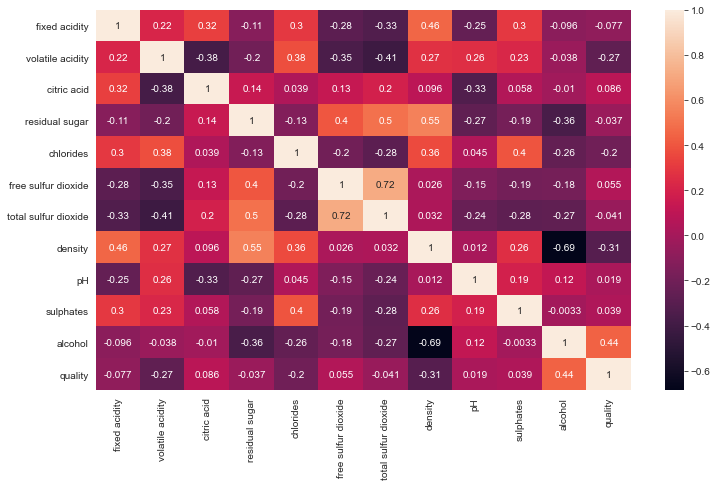

In [5]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True);

__Outcomes:__
- Highest correlation in
    - alcohol and density (it is logical: alcohol has lower specific gravity to water(SG=0.794 => SG<1) 
    - alcohol and quality (__interesting__) - will be used
    - density and residual_sugar (it is logical: sugar has higher specific gravity to water (SG>1) ) 
    - residual_sugar and sulphur dioxide ( logical: sugar possitively affects to fermentation, actually starts the fermentation process, sulphur, on the other hand, decreases fermantation process and preserves the wine from additional fermetization in bottles. 
- In next steps during increasing model predicativity steps __drop sulphur dioxide__ feature from the feature list

#### Split quality to 3 groups  ['low','medium','high']

In [34]:
a = {i:'low' if i < 5 else 'medium' if i<9 else 'high'  for i in range(1,10) }
df['quality_cat'] = df.quality.map(a)
print('quality:|\tclass:')
print('-'*35)
for key,value in a.items():
    print(key,'\t|\t',value)

quality:|	class:
-----------------------------------
1 	|	 low
2 	|	 low
3 	|	 low
4 	|	 low
5 	|	 medium
6 	|	 medium
7 	|	 medium
8 	|	 medium
9 	|	 high


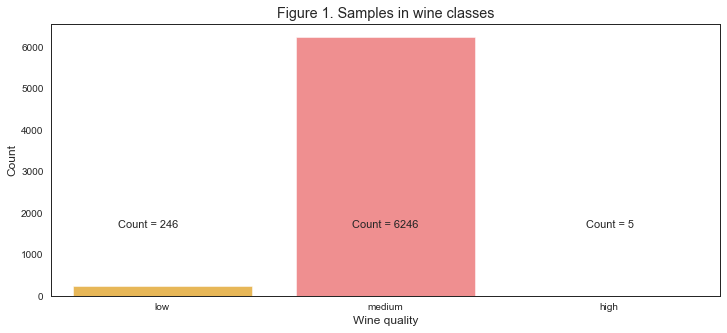

In [76]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
a = df.quality_cat.value_counts()
sns.barplot(a.index,a,palette='spring_r',order=['low','medium',  'high'] )
plt.title('Figure 1. Samples in wine classes')
plt.ylabel('Count')
plt.xlabel('Wine quality')
plt.text(.1,.25,'Count = {}'.format(a[1]),fontsize=11 ,transform=ax.transAxes,ha='left')
plt.text(.45,.25,'Count = {}'.format(a[0]),fontsize=11 ,transform=ax.transAxes)
plt.text(.8,.25,'Count = {}'.format(a[2]),fontsize=11 ,transform=ax.transAxes)
fig.savefig('Samples in wine classes.png');



Wine is splitted into three groups with unbalanced sample count: 
- class 0: low quality wines 250 samples
- class 1: medium quality wines 4250 samples
- class 2: high quality wines 5 samples

Three approaches to increase samples in class 2 (high quality wines) were used :
- increase class 2 weights
- generate new samples by making mean of two samples from class 2
- generate new samples from class 1 + unique feature values (special for class 2)
    
How these approaches were implemented (in Code) and Used please see in paragraph 'data preparation' please see this paragrph hereunder

#### Focus on high quality wines. What component adds wine excellent flavour?

In [46]:
from py_scripts.get_features_correlation import get_features_correlation

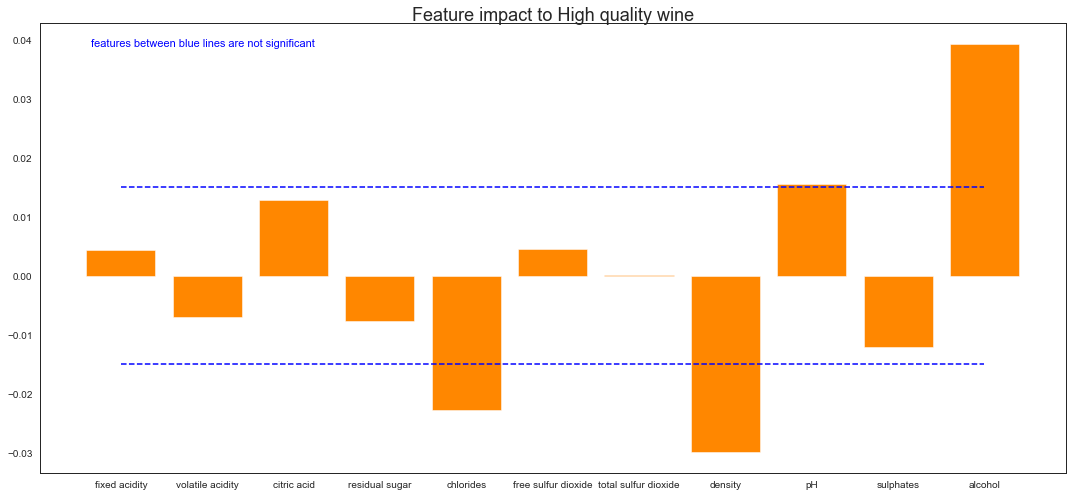

In [47]:
get_features_correlation(df,name= 'Feature impact to High quality wine')

__Outcomes__

As minimum in model will be included: 
   - clorides, 
   - density,
   - pH,
   - alcohol

__Features vs quality=9 correlation__

In [103]:
from py_scripts.make_regplot import make_regplot

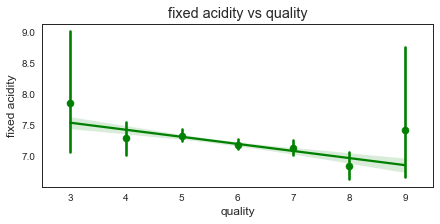

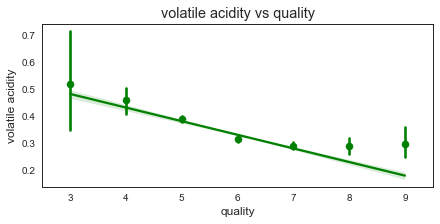

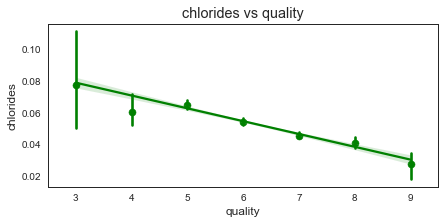

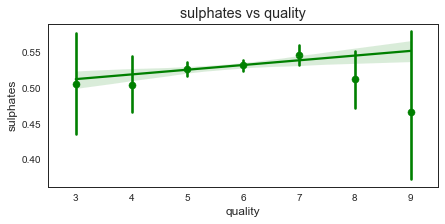

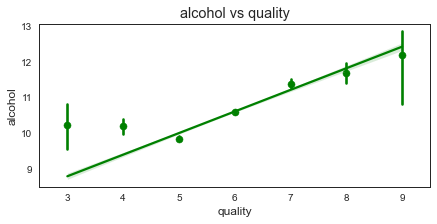

In [102]:
feature = [
    'fixed acidity',
    'volatile acidity',
    'chlorides',
    'sulphates',
    'alcohol'
]

make_regplot(df,y=feature)

__Results for quality=9__

The following features will be used in quality=9 classification:
- clorides, 
- density
- pH
- alcohol
- fixed acidity
- volatile acidity
- sulphates


#### Focus on medium_quality wines. What component adds wine excellent flavour?

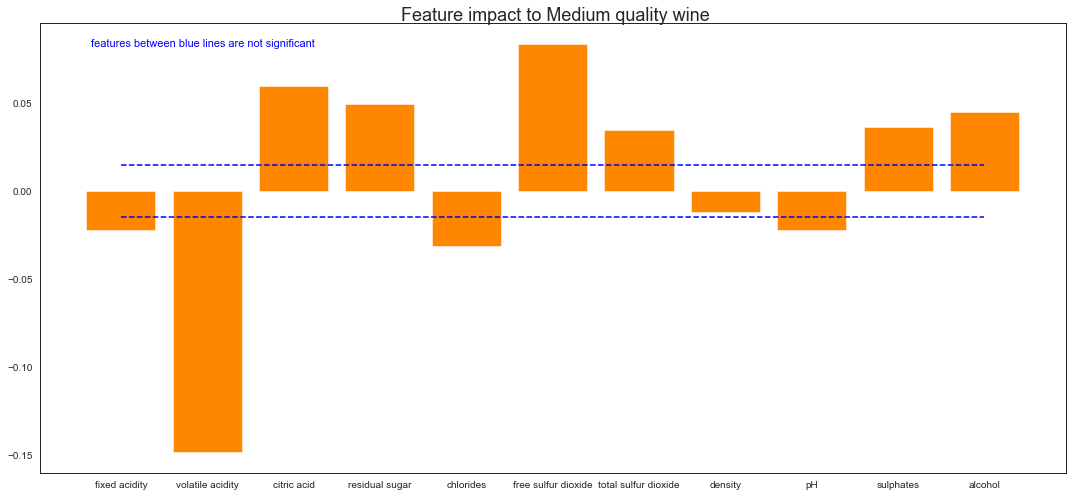

In [12]:
get_features_correlation(df,target_value= range(5,9),name='Feature impact to Medium quality wine',)

**Density** has a **low influence** to medium_quality wine, and **will be removed**.

### Data analysis conclusion:

- There are __5 examples__ of high quality wines (__quality = 9 (the highest )__) in dataset. Each of them has specific features, different from the medium wines
    - clorides, 
    - density
    - pH
    - alcohol
    - fixed acidity
    - volatile acidity
    - sulphates

- The medium wines are __6246 examples__  (__quality = between 5 and 8__)
    - all features are significant except density
    - Density has a low influence to medium_quality wine, and should be removed
    
- the other wines will be considered as low quality wine __246 examples__